In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)

In [2]:
df = pd.read_csv("Dataset/train.csv")
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Untersuchung von linearen Kombinationen zwischen die Features.

<AxesSubplot:>

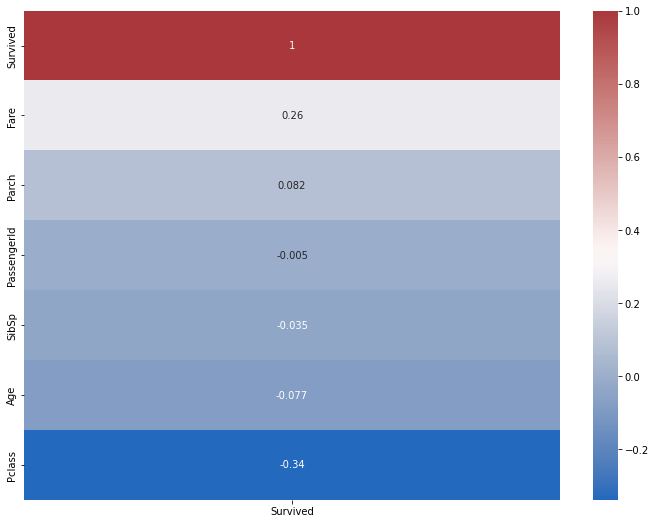

In [6]:
sns.heatmap(df.corr()[["Survived"]].sort_values(by="Survived",ascending=False), annot=True, cmap='vlag')

__Interpretation:__ Hier kann man deutlich sehen,dass die "Fare","Pclass" haben zumindest einen Enfluss auf unsere Target-Feature. Hier werden die beiden Feature weiter untersucht

In [7]:
df.groupby(["SibSp"]).Survived.agg(["mean","count"])

,mean,count
SibSp,,
0,0.345395,608
1,0.535885,209
2,0.464286,28
3,0.250000,16
4,0.166667,18
5,0.000000,5
8,0.000000,7


In [8]:
df.Parch.sort_values(ascending=False)
df.groupby(["Parch"]).Survived.agg(["mean","count"])

,mean,count
Parch,,
0,0.343658,678
1,0.550847,118
2,0.500000,80
3,0.600000,5
4,0.000000,4
5,0.200000,5
6,0.000000,1


## Visualizierung der Features, die eine Korrelation zeigen.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

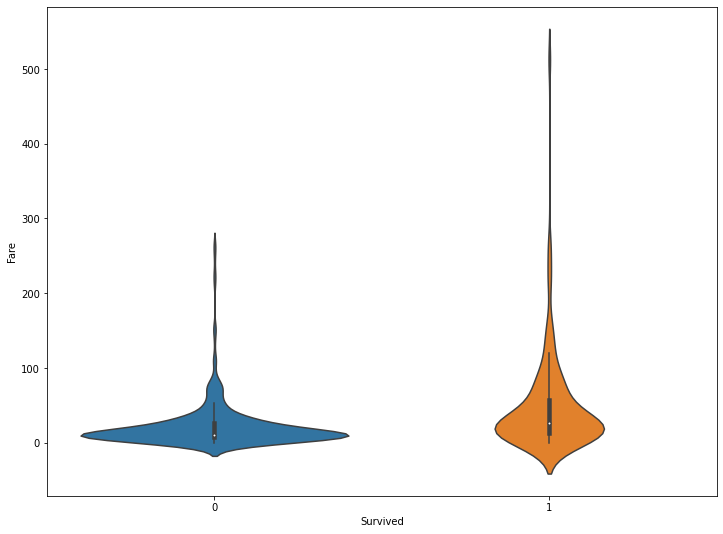

In [9]:
sns.violinplot(x='Survived',y='Fare', data=df)

__Interpretation__: nach diesem Plot kann man sagen, dass viele gestorbene Fahrgäste haben ein kleineres Fare.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

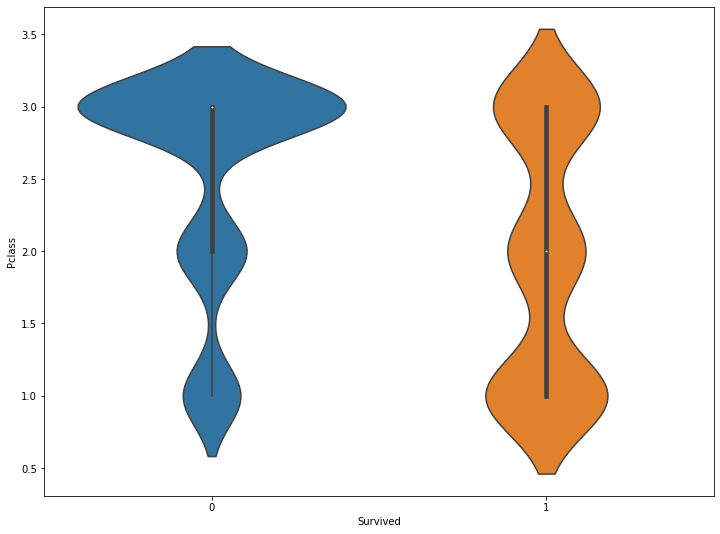

In [10]:
sns.violinplot(x='Survived',y='Pclass', data=df)

In [11]:
df.groupby(["Pclass"])["Survived"].agg(["count","mean"])

,count,mean
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


__Interpretation__: je höher die Klasse ist, desto höher sind die Chancen zu sterben.Es kann sein Z.B die dritte Klasse also (Pclass= 3) sich in der unteren Teil der Titanic befindet. Das würde bedeuten, dass die Fahrgäste brauchen mehr Ziet , um den Ausgang in der oberen Teil der Titanic zu erreichen. Und von daher haben nicht viele von denen überlebt.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

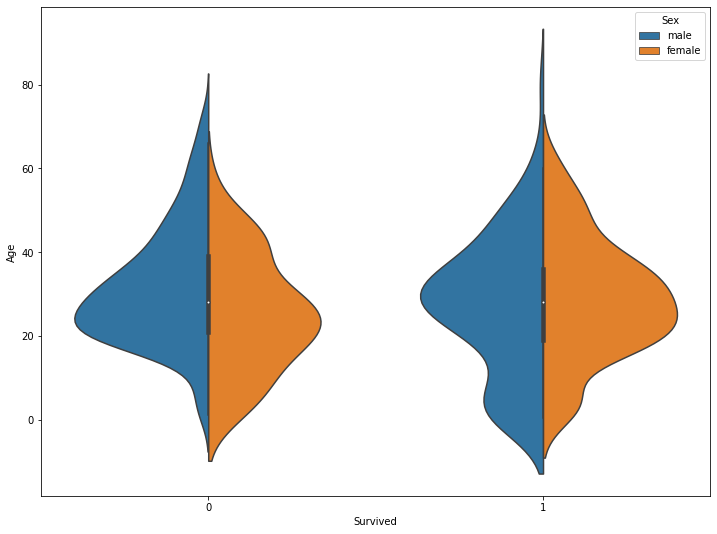

In [12]:
sns.violinplot(x='Survived', y='Age',hue=df.Sex, data=df, split=True)

## Hier werden einige kategoriale Variables untersucht wie Z.b (Sex,Embarked,Cabin,Ticket)

In [24]:
df.groupby(["Sex"])["Survived"].agg(["mean","count"])

,mean,count
Sex,,
female,0.742038,314
male,0.188908,577


__Interpretation:__ Der obere Result zeigt, dass im Vergleich zu den Männer, haben Frauen eine höher Wahrscheinlichkeit  zu überleben.

In [14]:
df.groupby(["Embarked"])["Survived"].agg(["mean","count"])

,mean,count
Embarked,,
C,0.553571,168
Q,0.389610,77
S,0.336957,644


## Model Erstellung

In [15]:
categorical_features = df[["Sex","Embarked"]]
numerical_features = df[["Fare","Pclass","Age","SibSp"]]
categorical_features = pd.get_dummies(categorical_features)
categorical_features
X = np.array(pd.concat([numerical_features,categorical_features], axis=1))
y = np.array(df["Survived"])

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)
steps= [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean',)),('Scaler',StandardScaler()),('SVM',SVC())]
pip = Pipeline(steps=steps)
pip.fit(X_train,y_train)

Pipeline(steps=[('imputation', SimpleImputer()), ('Scaler', StandardScaler()),
                ('SVM', SVC())])

In [17]:
print("Score",pip.score(X_test,y_test))

Score 0.820627802690583


In [18]:
parameters = {'SVM__C': np.logspace(-2,3,num = 6 , base=10),
             'SVM__gamma': np.logspace(-3,3, num=7, base=10),
            }
search  = GridSearchCV(pip, parameters, cv=5)
search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputation', SimpleImputer()),
                                       ('Scaler', StandardScaler()),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'SVM__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

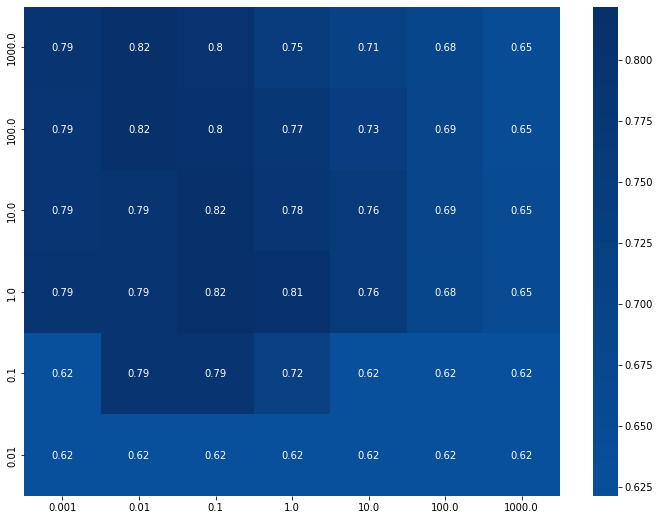

In [19]:
sns.heatmap(search.cv_results_['mean_test_score'].reshape(6,7), annot=True,center=0, xticklabels=parameters['SVM__gamma'], yticklabels=parameters['SVM__C'], cmap='Blues').invert_yaxis()

In [20]:
print('Mit den Parametern', search.best_params_, 'konnte eine durchschnittliche Accuracy von', search.best_score_, 'erreicht werden.')

Mit den Parametern {'SVM__C': 1.0, 'SVM__gamma': 0.1} konnte eine durchschnittliche Accuracy von 0.8218381775333856 erreicht werden.


## Model Evaluierung

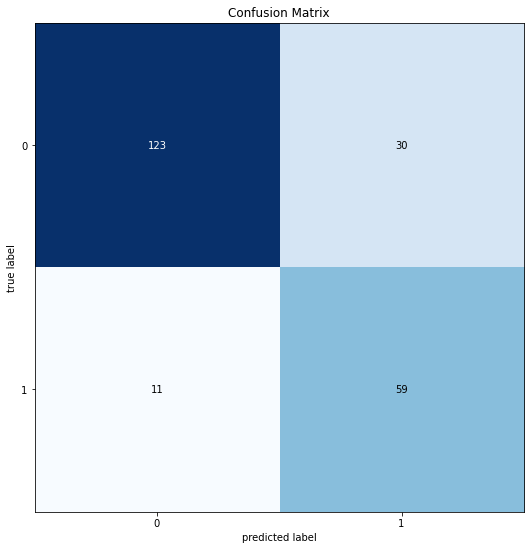

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

y_pred = search.predict(X_test)

CM = confusion_matrix(y_pred, y_test)
ax = plot_confusion_matrix(CM)
plt.title("Confusion Matrix")
plt.show()

In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       153
           1       0.66      0.84      0.74        70

    accuracy                           0.82       223
   macro avg       0.79      0.82      0.80       223
weighted avg       0.84      0.82      0.82       223

